# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Reading Data

In [3]:
df = pd.read_csv("car_evaluation.csv", header=None)
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
display("size of the dataset:", df.shape)
display("data types:", df.dtypes)

'size of the dataset:'

(1728, 7)

'data types:'

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object
class,object


# EDA

In [5]:
df.describe().T

,count,unique,top,freq
buying,1728,4,vhigh,432
maint,1728,4,vhigh,432
doors,1728,4,2,432
persons,1728,3,2,576
lug_boot,1728,3,small,576
safety,1728,3,low,576
class,1728,4,unacc,1210


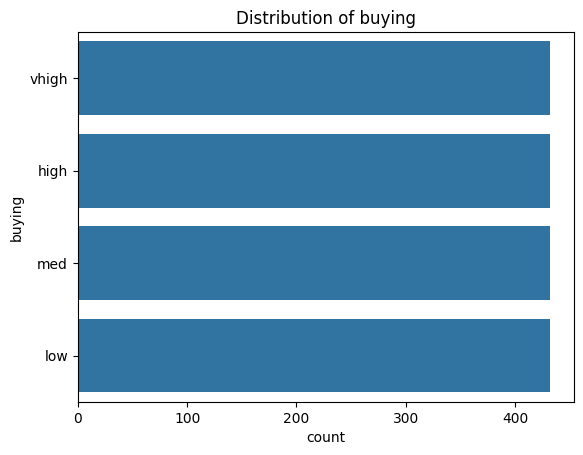

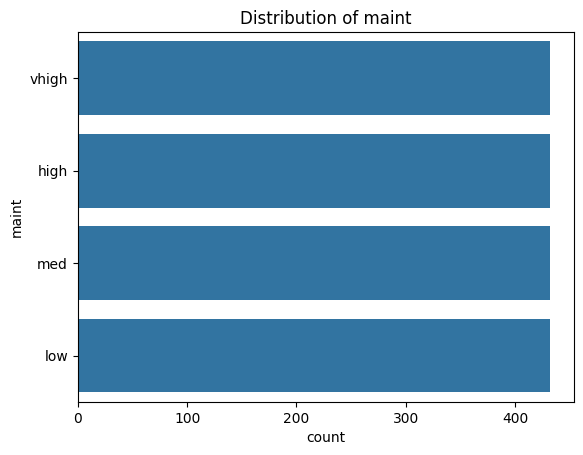

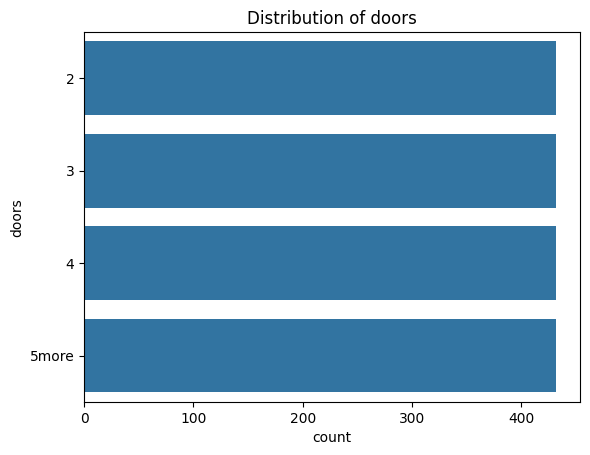

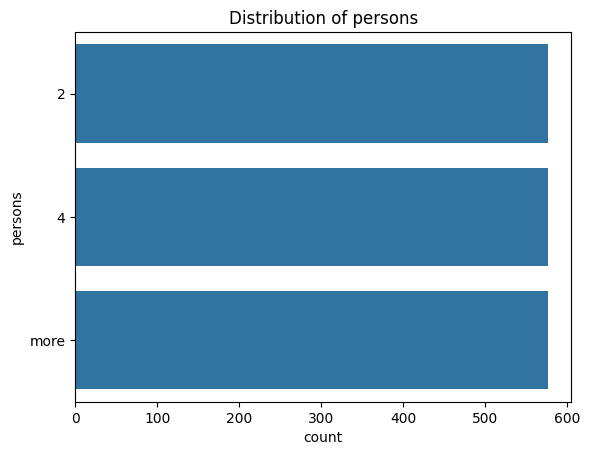

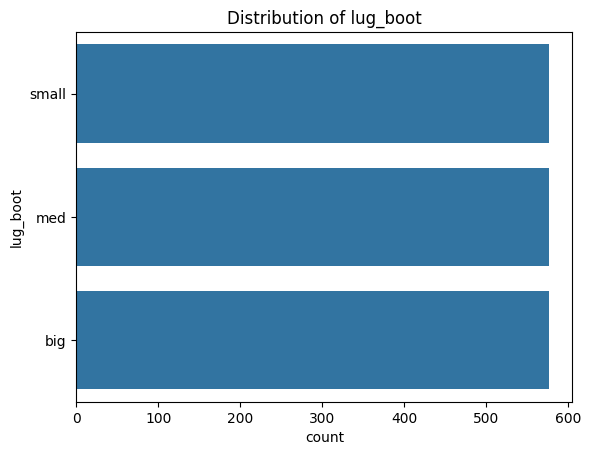

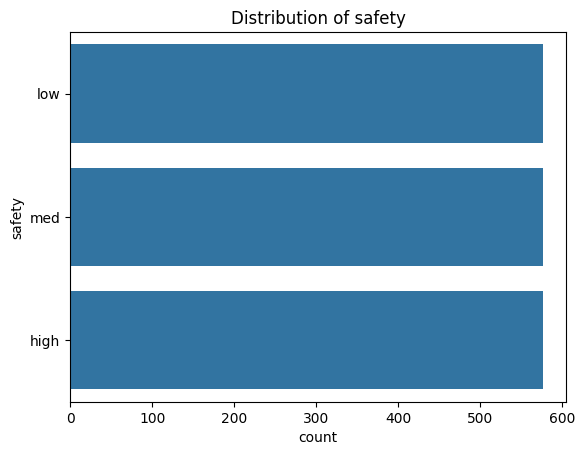

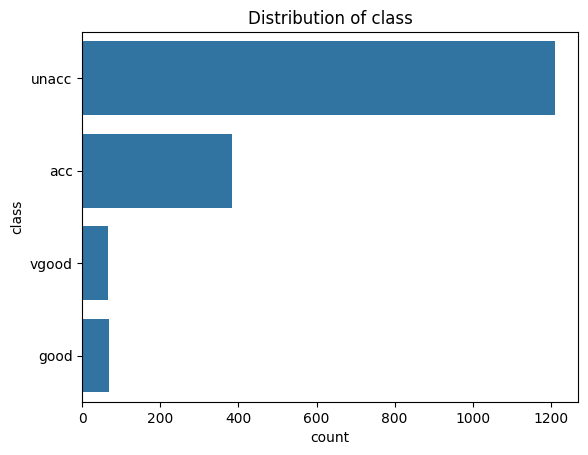

In [6]:
def plot_bar(df):

    for i in df.columns:
        plt.subplot(1,1,1)
        sns.countplot(df[i])
        plt.title(f"Distribution of {i}")
        plt.show()

plot_bar(df)

# **Pre-processing**

In [7]:
# check for missing values
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


# **Label Encoding**

##### 4 features (buying, maint, lug_boot, class) have an order in data, so, we can use ordinal encoding for it. Features like doors and persons has only one categorical variable, which can be changed to a number without encoding the whole column. Label encoding can be applied to Class column

In [8]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Ordinal Encoding
ordinal_features = ['buying', 'maint', 'lug_boot', 'safety']
ordinal_encoder = OrdinalEncoder()
df[ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features])

# Label Encoding for 'class'
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Change values for doors and persons
df['doors'] = df['doors'].replace('5more', 5).astype(int)
df['persons'] = df['persons'].replace('more', 5).astype(int)

df.sample(5)

,buying,maint,doors,persons,lug_boot,safety,class
1159,2.0,2.0,4,5,0.0,2.0,0
176,3.0,0.0,4,4,1.0,0.0,2
707,0.0,2.0,4,2,1.0,0.0,2
1196,2.0,1.0,2,2,0.0,0.0,2
1063,2.0,0.0,5,4,2.0,2.0,2


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
buying,1728.0,1.500000,1.118358,0.0,0.75,1.5,2.25,3.0
maint,1728.0,1.500000,1.118358,0.0,0.75,1.5,2.25,3.0
doors,1728.0,3.500000,1.118358,2.0,2.75,3.5,4.25,5.0
persons,1728.0,3.666667,1.247580,2.0,2.00,4.0,5.00,5.0
lug_boot,1728.0,1.000000,0.816733,0.0,0.00,1.0,2.00,2.0
safety,1728.0,1.000000,0.816733,0.0,0.00,1.0,2.00,2.0
class,1728.0,1.553241,0.875948,0.0,1.00,2.0,2.00,3.0


# Splitting Data

In [10]:
X = df.drop(columns=['class'])
Y = df['class']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state =1)
print("size of the training dataset:", x_train.shape[0])
print("size of the training labels:", y_train.shape[0])
print("size of the testing dataset:", x_test.shape[0])
print("size of the testing labels:", y_test.shape[0])

size of the training dataset: 1382
size of the training labels: 1382
size of the testing dataset: 346
size of the testing labels: 346


In [11]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### our dataset has inbalanced labels. So, using 'accuracy' metric is not the best metric for this problem, as it will mislead us, beliving we have a good model but for this case we can use class_weight=balanced in order to prioritizing lower values

## Logistic Regression


## random state doesn't really affect the logistic regression

In [12]:
logistic_model_scaled = LogisticRegression(C=1, penalty='l2', solver='lbfgs', max_iter=3000,class_weight="balanced",random_state=42)
logistic_model_scaled.fit(x_train_scaled, y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=3000, random_state=42)

In [13]:
y_pred_scaled = logistic_model_scaled.predict(x_test_scaled)
accuracy_logisticR = accuracy_score(y_test, y_pred_scaled)




In [14]:
print(f"Accuracy score {accuracy_logisticR}")

Accuracy score 0.5144508670520231


## Cross validation = 5 mean for logistic regresion

In [15]:
logistic_cvscores = cross_val_score(logistic_model_scaled,x_train, y_train, cv=5)
print('Cross-Validation Accuracy Scores', logistic_cvscores.mean())

Cross-Validation Accuracy Scores 0.5050463035630199


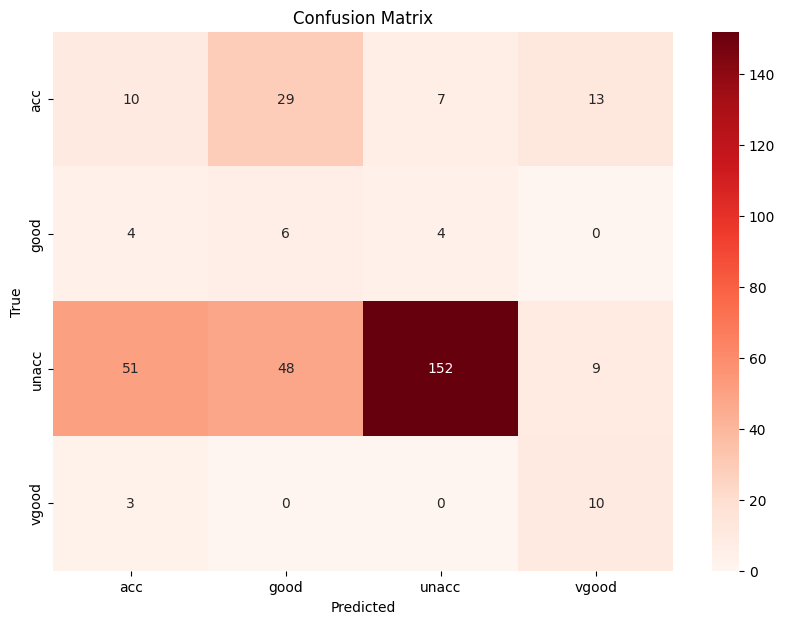

In [16]:
cm = confusion_matrix(y_test, y_pred_scaled)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [17]:
from sklearn.metrics import classification_report
label_names = label_encoder.inverse_transform([0, 1, 2, 3])
# Print classification report with actual label names
print(classification_report(y_test, y_pred_scaled, target_names=label_names))

              precision    recall  f1-score   support

         acc       0.15      0.17      0.16        59
        good       0.07      0.43      0.12        14
       unacc       0.93      0.58      0.72       260
       vgood       0.31      0.77      0.44        13

    accuracy                           0.51       346
   macro avg       0.37      0.49      0.36       346
weighted avg       0.74      0.51      0.59       346



## Decision Trees

In [18]:
decision_tree_model = DecisionTreeClassifier(random_state=42, max_depth=10,min_samples_split=10,min_samples_leaf=5,max_features="sqrt")
decision_tree_model.fit(x_train_scaled, y_train)



DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [19]:
y_pred_scaled = decision_tree_model.predict(x_test_scaled)
accuracy_tree = accuracy_score(y_test, y_pred_scaled)
print(f"Test Set Accuracy (Decision Tree): {accuracy_tree:}")

Test Set Accuracy (Decision Tree): 0.8988439306358381


## K = 5 Decision tree

In [20]:
tree_cvscores = cross_val_score(decision_tree_model, x_train_scaled, y_train, cv=5)
print(f"Cross-Validation Accuracy (Decision Tree): {tree_cvscores.mean():}")


Cross-Validation Accuracy (Decision Tree): 0.8458536074922828


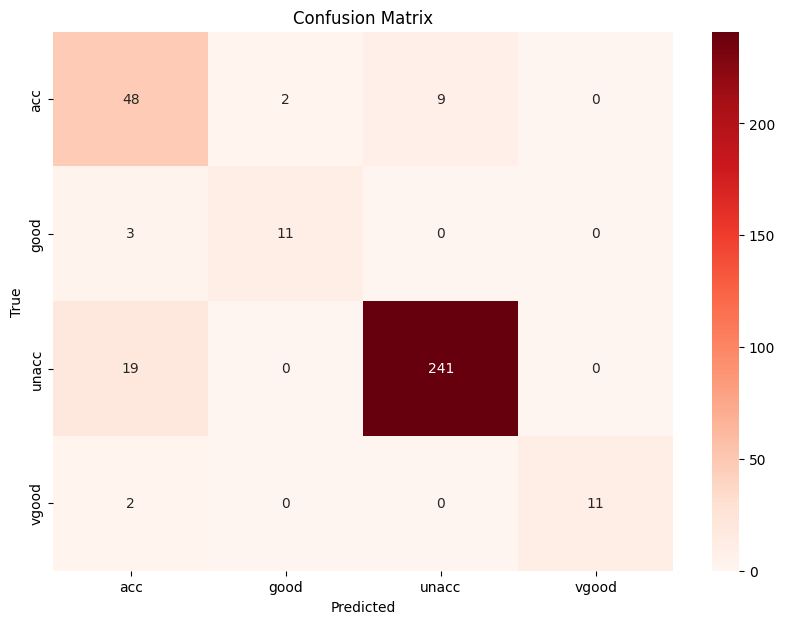

In [21]:
cm = confusion_matrix(y_test, y_pred_scaled)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [22]:
label_names = label_encoder.inverse_transform([0, 1, 2, 3])
print(classification_report(y_test, y_pred_scaled, target_names=label_names))

              precision    recall  f1-score   support

         acc       0.67      0.81      0.73        59
        good       0.85      0.79      0.81        14
       unacc       0.96      0.93      0.95       260
       vgood       1.00      0.85      0.92        13

    accuracy                           0.90       346
   macro avg       0.87      0.84      0.85       346
weighted avg       0.91      0.90      0.90       346



## SVM


In [23]:
svm_model = SVC(C=2.0, kernel='rbf', gamma='scale', class_weight='balanced', random_state=42)
svm_model.fit(x_train_scaled, y_train)


SVC(C=2.0, class_weight='balanced', random_state=42)

In [24]:
y_pred_svm = svm_model.predict(x_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Test Set Accuracy (SVM): {accuracy_svm:}")

Test Set Accuracy (SVM): 0.9075144508670521


## K=5 SVM

In [25]:
svm_cvscores = cross_val_score(svm_model, x_train_scaled, y_train, cv=5)
print(f"Cross-Validation Accuracy (SVM): {svm_cvscores.mean():}")

Cross-Validation Accuracy (SVM): 0.8777010411761628


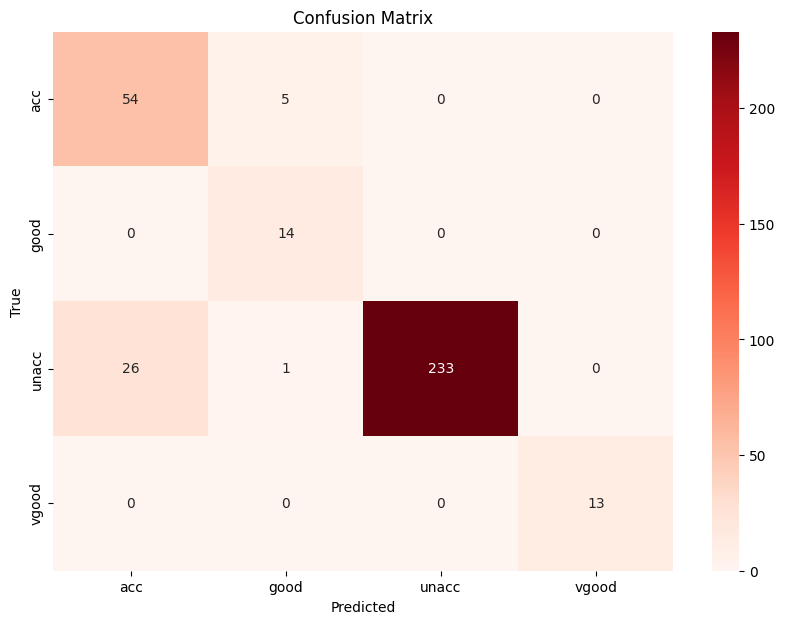

In [26]:
cm = confusion_matrix(y_test, y_pred_svm)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [27]:
from sklearn.metrics import classification_report
label_names = label_encoder.inverse_transform([0, 1, 2, 3])

print(classification_report(y_test, y_pred_svm, target_names=label_names))

              precision    recall  f1-score   support

         acc       0.68      0.92      0.78        59
        good       0.70      1.00      0.82        14
       unacc       1.00      0.90      0.95       260
       vgood       1.00      1.00      1.00        13

    accuracy                           0.91       346
   macro avg       0.84      0.95      0.89       346
weighted avg       0.93      0.91      0.91       346



In [28]:
mlp_model = MLPClassifier(hidden_layer_sizes=(16,8),solver='adam',alpha=0.6,learning_rate='adaptive',learning_rate_init=0.001,
                          max_iter=3000,random_state=42)
mlp_model.fit(x_train_scaled, y_train)



MLPClassifier(alpha=0.6, hidden_layer_sizes=(16, 8), learning_rate='adaptive',
              max_iter=3000, random_state=42)

In [29]:
# Predict on the scaled test data and calculate accuracy
y_pred_mlp = mlp_model.predict(x_test_scaled)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Test Set Accuracy (MLP): {accuracy_mlp:}")

Test Set Accuracy (MLP): 0.9595375722543352


# K=5 MLPC

In [30]:
mlp_cvscores = cross_val_score(mlp_model, x_train_scaled, y_train, cv=5)
print(f"Cross-Validation Accuracy (MLP): {mlp_cvscores.mean():}")

Cross-Validation Accuracy (MLP): 0.9746690734055357


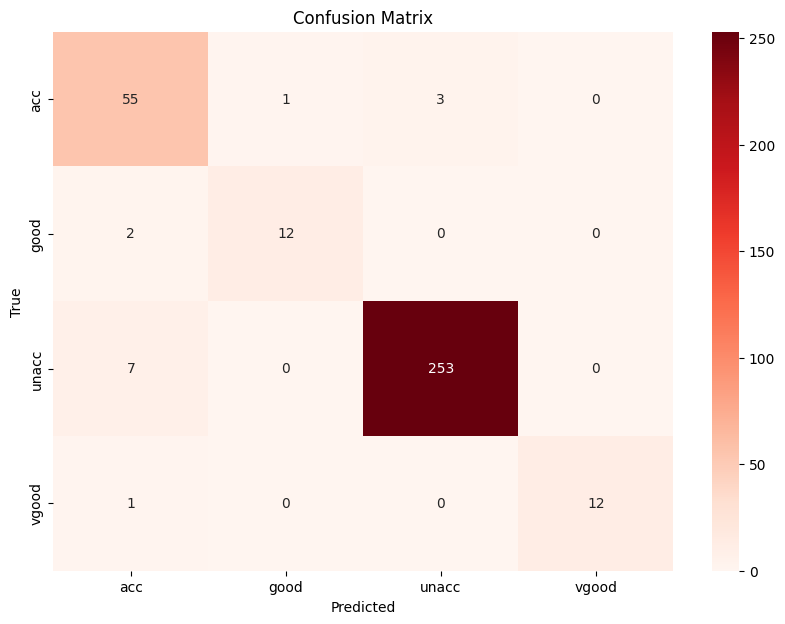

In [31]:
cm = confusion_matrix(y_test, y_pred_mlp)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [32]:
from sklearn.metrics import classification_report
label_names = label_encoder.inverse_transform([0, 1, 2, 3])

print(classification_report(y_test, y_pred_mlp, target_names=label_names))

              precision    recall  f1-score   support

         acc       0.85      0.93      0.89        59
        good       0.92      0.86      0.89        14
       unacc       0.99      0.97      0.98       260
       vgood       1.00      0.92      0.96        13

    accuracy                           0.96       346
   macro avg       0.94      0.92      0.93       346
weighted avg       0.96      0.96      0.96       346



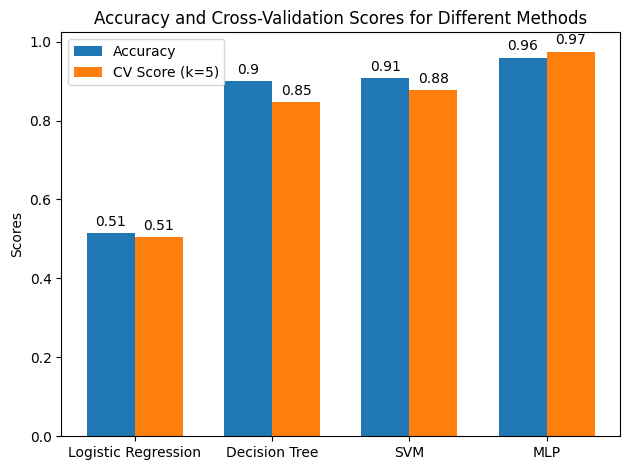

In [33]:
import matplotlib.pyplot as plt


methods = ['Logistic Regression', 'Decision Tree', 'SVM', 'MLP']
accuracies = [accuracy_logisticR, accuracy_tree, accuracy_svm, accuracy_mlp]
cv_scores = [logistic_cvscores.mean(), tree_cvscores.mean(), svm_cvscores.mean(), mlp_cvscores.mean()]

x = np.arange(len(methods))  # the label locations
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy')
rects2 = ax.bar(x + width/2, cv_scores, width, label='CV Score (k=5)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Accuracy and Cross-Validation Scores for Different Methods')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()

# Add labels above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

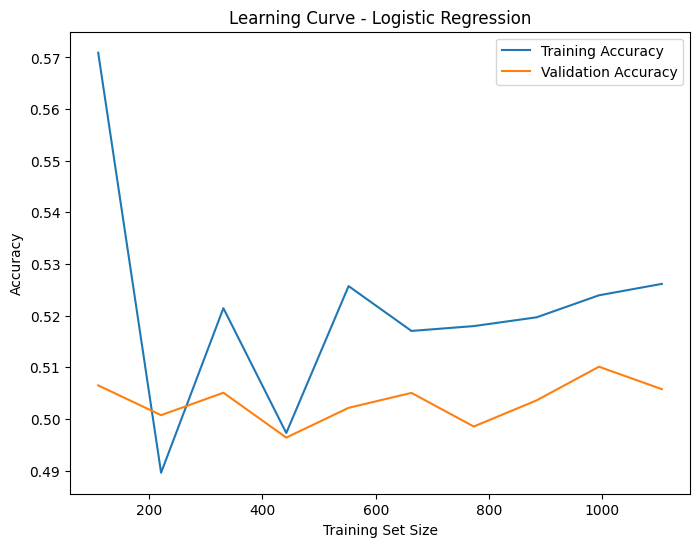

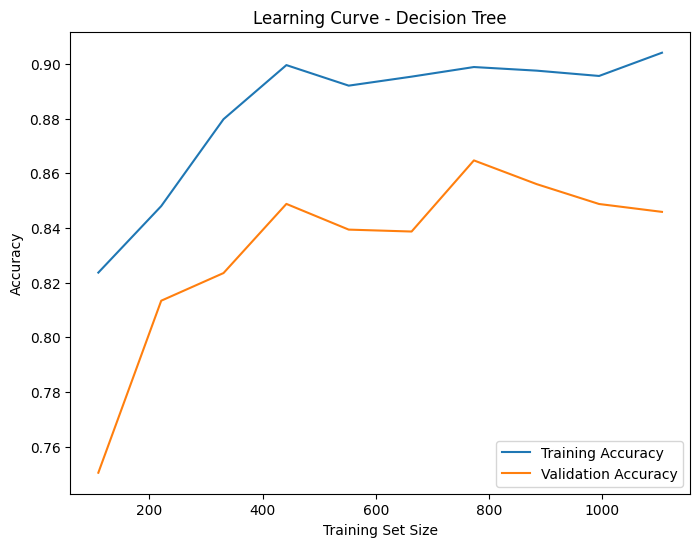

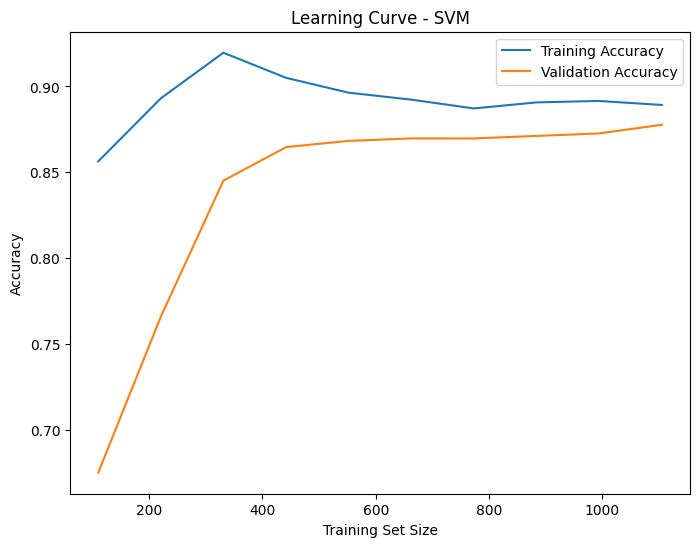

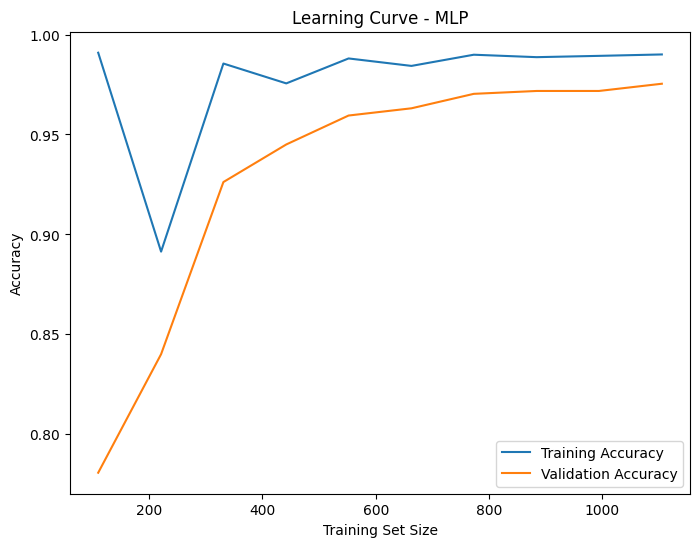

In [34]:

train_sizes, train_scores_lr, test_scores_lr = learning_curve(
    logistic_model_scaled, x_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean_lr = np.mean(train_scores_lr, axis=1)
test_scores_mean_lr = np.mean(test_scores_lr, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean_lr, label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean_lr, label="Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Training Set Size")
plt.title("Learning Curve - Logistic Regression")
plt.legend()
plt.show()


train_sizes, train_scores_dt, test_scores_dt = learning_curve(
    decision_tree_model, x_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean_dt = np.mean(train_scores_dt, axis=1)
test_scores_mean_dt = np.mean(test_scores_dt, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean_dt, label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean_dt, label="Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Training Set Size")
plt.title("Learning Curve - Decision Tree")
plt.legend()
plt.show()


train_sizes, train_scores_svm, test_scores_svm = learning_curve(
    svm_model, x_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean_svm = np.mean(train_scores_svm, axis=1)
test_scores_mean_svm = np.mean(test_scores_svm, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean_svm, label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean_svm, label="Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Training Set Size")
plt.title("Learning Curve - SVM")
plt.legend()
plt.show()



train_sizes, train_scores_mlp, test_scores_mlp = learning_curve(
    mlp_model, x_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean_mlp = np.mean(train_scores_mlp, axis=1)
test_scores_mean_mlp = np.mean(test_scores_mlp, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean_mlp, label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean_mlp, label="Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Training Set Size")
plt.title("Learning Curve - MLP")
plt.legend()
plt.show()

In [35]:
print("Logistic Regression:")
print(f"Accuracy: {accuracy_logisticR}")
print(f"CV Accuracy: {logistic_cvscores.mean()}")
print("\nDecision Tree:")
print(f"Accuracy: {accuracy_tree}")
print(f"CV Accuracy: {tree_cvscores.mean()}")
print("\nSVM:")
print(f"Accuracy: {accuracy_svm}")
print(f"CV Accuracy: {svm_cvscores.mean()}")
print("\nMLP:")
print(f"Accuracy: {accuracy_mlp}")
print(f"CV Accuracy: {mlp_cvscores.mean()}")

Logistic Regression:
Accuracy: 0.5144508670520231
CV Accuracy: 0.5050463035630199

Decision Tree:
Accuracy: 0.8988439306358381
CV Accuracy: 0.8458536074922828

SVM:
Accuracy: 0.9075144508670521
CV Accuracy: 0.8777010411761628

MLP:
Accuracy: 0.9595375722543352
CV Accuracy: 0.9746690734055357
